CÁLCULO DE TRELIÇA PLANA  

Descrição do Problema

![Alt text](image1.png)

Importando as Bibliotecas do Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Entrando com os dados do problema a ser resolvido

In [2]:
nos = pd.read_excel('Treliça.xlsx',sheet_name='Nós')
barras = pd.read_excel('Treliça.xlsx',sheet_name='Barras')

# Acertando os números dos nós e das barras conforme a figura (iniciando em 1)
nos.index += 1
barras.index += 1

# Trocando celulas vazias por zeros
nos.fillna(0, inplace=True)

In [3]:
# Printando os valores dos nós na tela
display(nos)

,X,Y,RX,RY,FX,FY
1,0,0,1.0,1.0,0.0,0.0
2,2,1,0.0,0.0,8000.0,-9000.0
3,2,0,0.0,0.0,0.0,0.0
4,4,2,0.0,0.0,8000.0,-9000.0
5,4,0,0.0,0.0,0.0,0.0
6,6,3,0.0,0.0,0.0,-15000.0
7,6,0,0.0,0.0,0.0,0.0
8,8,2,0.0,0.0,-8000.0,-9000.0
9,8,0,0.0,0.0,0.0,0.0
10,10,1,0.0,0.0,-8000.0,-9000.0


In [4]:
# Printando os valores das barras na tela
display(barras)

,N1,N2,A,E
1,1,2,0.01,210000000000
2,1,3,0.01,210000000000
3,2,3,0.01,210000000000
4,2,4,0.01,210000000000
5,2,5,0.01,210000000000
6,3,5,0.01,210000000000
7,4,5,0.01,210000000000
8,4,6,0.01,210000000000
9,4,7,0.01,210000000000
10,5,7,0.01,210000000000


Criação da parte gráfica da Treliça

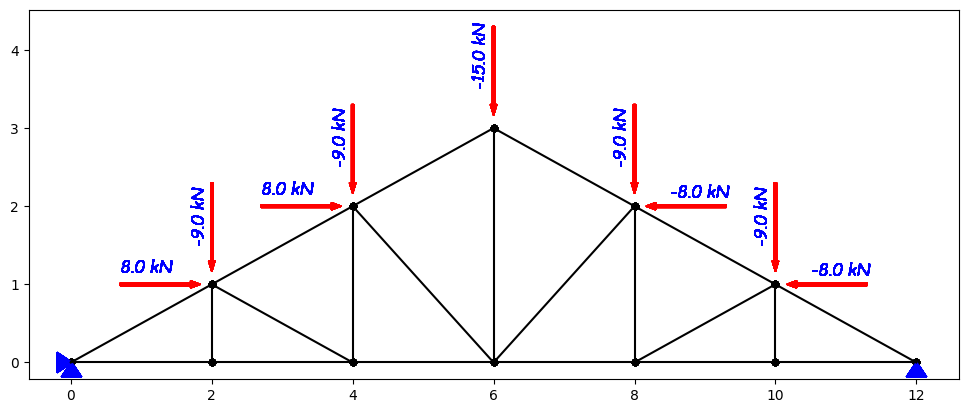

In [5]:
plt.figure(1,figsize=(12,4.8))

# Desenhando a estrutura
for barra in barras.index:
# Vamos passar os nós para as variáveis N1 e N2
 N1, N2 = barras.loc[barra, ['N1', 'N2']]

 
# Agora vamos acessar as coordendas de cada um dos nós
 x_inicial, y_inicial = nos.loc[N1, ['X','Y']]
 x_final, y_final = nos.loc[N2, ['X','Y']] 

 # Vetores de X's e Y's
 X = np.array([x_inicial, x_final])
 Y = np.array([y_inicial, y_final]) 

 plt.plot(X,Y, color='black')
     
 for no in nos.index:
  # Importando dados do nós
  X, Y, RX, RY, FX, FY = nos.loc[no]

  # Desenhando os nós
  plt.scatter(X,Y, s=20, marker ='o',color ='black') 

  # Desenhando os apoios
  if RX == 1:
   plt.scatter(X,Y, s=200, marker = 5,color ='blue') # 6 é a restição vertical e 5 horizontal

  if RY == 1:
   plt.scatter(X,Y, s=200, marker = 6,color ='blue') # 6 é a restição vertical e 5 horizontal

  # Desenhando as forças atuantes no Eixo X
  if FX > 0:
   plt.arrow(X-1.3, Y, 1, 0, color='r', width=0.03)
   plt.text(X-1.3,Y+0.08,'{} kN'.format(FX/1000),
            va='bottom', 
            c='blue', 
            fontname='cursive',
            fontstyle='italic',
            size='large',
            fontweight='roman')
   
  if FX < 0:
   plt.arrow(X+1.3, Y, -1, 0, color='r', width=0.03)
   plt.text(X+0.5,Y+0.05,'{} kN'.format(FX/1000),
            va='bottom', 
            c='blue', 
            fontname='cursive',
            fontstyle='italic',
            size='large',
            fontweight='roman')
   
  # Desenhando as forças atuantes no Eixo Y
  if FY > 0:
   plt.arrow(X, Y-1.3, 0, 1, color='r', width=0.03)
   plt.text(X-0.3,Y+0.5,'{} kN'.format(FY/1000),
            va='bottom',
            rotation=90, 
            c='blue', 
            fontname='cursive',
            fontstyle='italic',
            size='large',
            fontweight='roman')
   
  if FY < 0:
   plt.arrow(X, Y+1.3, 0, -1, color='r', width=0.03)
   plt.text(X-0.3,Y+0.5,'{} kN'.format(FY/1000),
            va='bottom',
            rotation=90, 
            c='blue', 
            fontname='cursive',
            fontstyle='italic',
            size='large',
            fontweight='roman')

  # Para exibir a Figura em outras IDEs utilizar este:
  # plt.show()

Cálculos dos comprimentos das barras, senos e cossenos

In [6]:
# Criação de listas vazias para armazenar as variáves
Ls = []
senos = []
cossenos = []

for barra in barras.index:
 # Vamos passar os nós para as variáveis N1 e N2
 N1, N2 = barras.loc[barra, ['N1', 'N2']]

 # Agora vamos acessar as coordendas de cada um dos nós
 x1, y1 = nos.loc[N1, ['X','Y']]
 x2, y2 = nos.loc[N2, ['X','Y']]

 # O comprimento da barra é dado pelo teorema de Pitagoras
 Lx = x2 - x1
 Ly = y2 - y1

 L = np.sqrt(Lx**2 + Ly**2) # Comprimeto real da barra

 # Os cossenos diretores são então:
 seno = Ly/L
 coss = Lx/L

 # Inserindo nas listas
 Ls.append(L)
 senos.append(seno)
 cossenos.append(coss)

# Agora que saimos do loop vamos inserir no DataFrame
barras['L'] = Ls
barras['sen'] = senos
barras['cos'] = cossenos

In [7]:
# Printando novo DataFrame
barras

,N1,N2,A,E,L,sen,cos
1,1,2,0.01,210000000000,2.236068,0.447214,0.894427
2,1,3,0.01,210000000000,2.000000,0.000000,1.000000
3,2,3,0.01,210000000000,1.000000,-1.000000,0.000000
4,2,4,0.01,210000000000,2.236068,0.447214,0.894427
5,2,5,0.01,210000000000,2.236068,-0.447214,0.894427
6,3,5,0.01,210000000000,2.000000,0.000000,1.000000
7,4,5,0.01,210000000000,2.000000,-1.000000,0.000000
8,4,6,0.01,210000000000,2.236068,0.447214,0.894427
9,4,7,0.01,210000000000,2.828427,-0.707107,0.707107
10,5,7,0.01,210000000000,2.000000,0.000000,1.000000


Montagem da Matriz de Rigidez

In [8]:
# Treliça = 2 graus de liberdade (gl) por nó
maxgl = 2*len(nos.index)
# Pré alocando a matriz de rigidez global
K = np.zeros([maxgl,maxgl])
K2 = np.zeros([maxgl, maxgl])

print(np.shape(K))
print(np.size(K))

# A alocação é realizada percorrendo todas as barras novamente, cálculando suas matrizes
# de rigidez local e alocando suas componentes na matriz global.

for barra in barras.index:
 # Vamos importar as propriedades necessárias para 
 # construção da matriz local e da matriz de rotação
 N1, N2, A, E, L, sen, cos = barras.loc[barra]

 # Matriz de Rigidez no sistema LOCAL
 Kl = E*A/L*np.array([[ 1, 0,-1, 0],
                     [ 0, 0, 0, 0],
                     [-1, 0, 1, 0],
                     [ 0, 0, 0, 0]])

 # Matriz de Rotação
 Mrot = np.array([[ cos, sen, 0, 0],
                 [-sen, cos, 0, 0],
                 [ 0, 0, cos, sen],
                 [ 0, 0, -sen, cos]])

 # Rotação da matriz de coordenadas locais para globais
 Klr = np.dot(np.dot(Mrot.T, Kl), Mrot)

 # Cálculo dos Graus de Liberdade (gl)
 gl1 = int(2*N1 - 1)
 gl2 = int(2*N1)
 gl3 = int(2*N2 - 1)
 gl4 = int(2*N2)

 # Aloca a matriz local na matriz global
 # Lembrando as propriedades das listas do Python!
 K[gl1-1:gl2, gl1-1:gl2] += Klr[0:2, 0:2]
 K[gl3-1:gl4, gl1-1:gl2] += Klr[2:4, 0:2]
 K[gl1-1:gl2, gl3-1:gl4] += Klr[0:2, 2:4]
 K[gl3-1:gl4, gl3-1:gl4] += Klr[2:4, 2:4]

 # Método alternativo de alocação
 gls = -1 + np.array([[gl1, gl2, gl3, gl4]])
 K2[gls.T, gls] += Klr

# Printa diferença entre métodos 
print(np.max(np.abs(K2-K)))



(24, 24)
576
0.0


Aplicação das condições de contorno


In [9]:
# Aplicando condições de contorno na matriz
Kr = np.copy(K)

# Impondo condições de apoio
for no in nos.index:
    # Importando dados dos nós 
    RX, RY = nos.loc[no, ['RX','RY']]
    
    # Determinar graus de liberdade
    gl1 = int(2*no-1)
    gl2 = int(2*no)
    
    # Desenhando os apoios
    if RX == 1:
        Kr[:, gl1-1] = 0
        Kr[gl1-1, :] = 0
        Kr[gl1-1, gl1-1] = 1
        print('Restringindo deslocamento em X no nó {}.'.format(no))
        
    if RY == 1:
        Kr[:, gl2-1] = 0
        Kr[gl2-1, :] = 0
        Kr[gl2-1, gl2-1] = 1
        print('Restringindo deslocamento em Y no nó {}.'.format(no))

Restringindo deslocamento em X no nó 1.
Restringindo deslocamento em Y no nó 1.
Restringindo deslocamento em Y no nó 12.


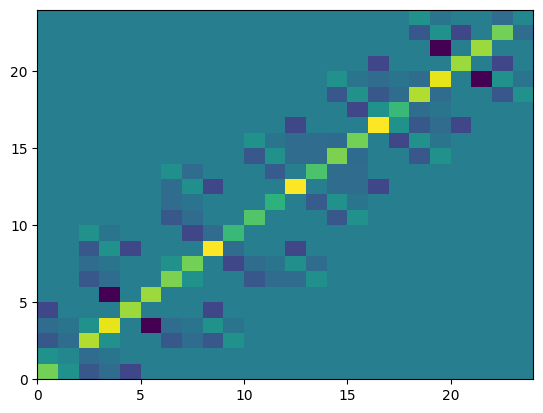

In [10]:
# Verificando consistencia da matriz de rigidez
plt.pcolormesh(K)

Montagem do Vetor de Forças 

In [11]:
# Montagem do vetor de forças
F = np.zeros([maxgl])

for no in nos.index:
    # Importando dados dos nós 
    FX, FY = nos.loc[no, ['FX','FY']]
    
    # Determinar graus de liberdade
    gl1 = int(2*no-1)
    gl2 = int(2*no)
    
    # Se existir carga aplica no vetor
    if FX != 0: 
        F[gl1-1] = FX
        
    if FY != 0: 
        F[gl2-1] = FY

In [12]:
print(F)

[     0.      0.   8000.  -9000.      0.      0.   8000.  -9000.      0.
      0.      0. -15000.      0.      0.  -8000.  -9000.      0.      0.
  -8000.  -9000.      0.      0.      0.      0.]


Resolução da Equação de Equilíbrio 

In [13]:
# Resolução do sistema
# A.x = b 
print("Determinante da matriz K=", np.linalg.det(K))
print("Determinante da matriz Kr=", np.linalg.det(Kr))

Determinante da matriz K= -1.938370934710581e+168
Determinante da matriz Kr= 3.2307169176867106e+188


In [14]:
D = np.linalg.solve(Kr, F)
print(D)

[ 0.00000000e+00  0.00000000e+00  1.86267152e-04 -5.08295574e-04
  4.85714286e-05 -5.08295574e-04  1.93767631e-04 -6.45747873e-04
  9.71428571e-05 -6.51938349e-04  1.33333333e-04 -6.34020692e-04
  1.33333333e-04 -6.71163549e-04  7.28990360e-05 -6.45747873e-04
  1.69523810e-04 -6.51938349e-04  8.03995148e-05 -5.08295574e-04
  2.18095238e-04 -5.08295574e-04  2.66666667e-04  0.00000000e+00]


Plotagem da Treliça Deformada 

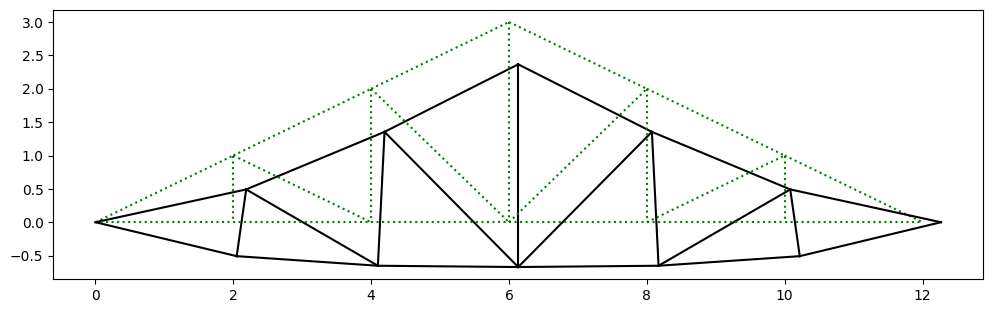

In [15]:
# Desenhando a estrutura DEFORMADA
plt.figure(2, figsize=(12,3.5))

esc = 1000

for barra in barras.index: 
    # Nós que compõem as barras
    N1, N2 = barras.loc[barra, ['N1', 'N2']]
    
    # Determinação das coordenadas
    x1, y1 = nos.loc[N1, ['X', 'Y']]
    x2, y2 = nos.loc[N2, ['X', 'Y']]
    
    # Vetores de Xs e Ys
    X = np.array([x1, x2])
    Y = np.array([y1, y2])
    
    # ORIGINAL
    plt.plot(X, Y, 'g:')
    
    # Determinar graus de liberdade
    gl1 = int(2*N1-1)
    gl2 = int(2*N1)
    gl3 = int(2*N2-1)
    gl4 = int(2*N2)
    
    # Somando deslocamentos à posição original
    x1d, y1d = x1+esc*D[gl1-1], y1+esc*D[gl2-1]
    x2d, y2d = x2+esc*D[gl3-1], y2+esc*D[gl4-1]
    
    # Vetores de Xsd e Ysd
    Xd = np.array([x1d, x2d])
    Yd = np.array([y1d, y2d])
    
    # Plota deformada
    plt.plot(Xd, Yd, 'k')

Cálculo das Reações

In [16]:
R = np.dot(K, D)
print(R)

[-5.82076609e-11  2.55000000e+04  8.00000000e+03 -9.00000000e+03
  4.22627905e-12  0.00000000e+00  8.00000000e+03 -9.00000000e+03
  1.16415322e-10  7.27595761e-12 -2.86471774e-11 -1.50000000e+04
  1.37132224e-10  6.54836185e-11 -8.00000000e+03 -9.00000000e+03
 -1.01863407e-10 -9.45874490e-11 -8.00000000e+03 -9.00000000e+03
  5.82076609e-11  0.00000000e+00 -2.91038305e-11  2.55000000e+04]


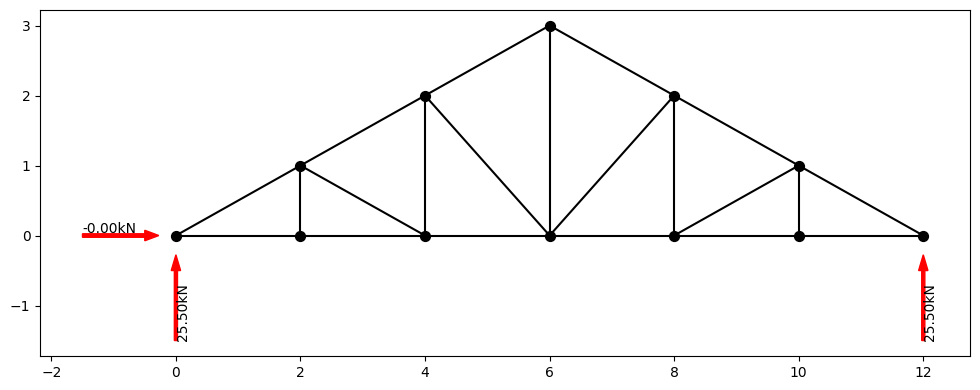

In [17]:
# Desenhando a estrutura
plt.figure(3, figsize=(12,4.5))

for barra in barras.index: 
    # Nós que compõem as barras
    N1, N2 = barras.loc[barra, ['N1', 'N2']]
    
    # Determinação das coordenadas
    x1, y1 = nos.loc[N1, ['X', 'Y']]
    x2, y2 = nos.loc[N2, ['X', 'Y']]
    
    # Vetores de Xs e Ys
    X = np.array([x1, x2])
    Y = np.array([y1, y2])
    
    plt.plot(X, Y, color='black')
    
for no in nos.index:
    # Importando dados dos nós 
    X, Y, RX, RY = nos.loc[no, ['X', 'Y', 'RX', 'RY']]
    
    # Desenhando rotulas
    plt.scatter(X, Y, s=50, color='black', marker="o") # 6 é restrição vertical e 5 na horizontal
    
    # Determinar graus de liberdade
    gl1 = int(2*no-1)
    gl2 = int(2*no)

     # Desenhando os apoios
    if RX == 1:
        ReacX = R[gl1-1]
        plt.arrow(X-1.5, Y, 1, 0, color='r', width=0.05)
        plt.text(X-1.5, Y, '{:.2f}kN'.format(ReacX/1000), va='bottom')
    if RY == 1:
        ReacY = R[gl2-1]
        plt.arrow(X, Y-1.5, 0, 1, color='r', width=0.05)
        plt.text(X, Y-1.5, '{:.2f}kN'.format(ReacY/1000), va='bottom', rotation=90)
    
# Exibe figura
plt.show()
    

Determinação dos Esforços nas Barras

In [18]:
# Determinação dos esforços nas barras
Esf = []

for barra in barras.index:
    N1, N2, A, E, L, sen, cos = barras.loc[barra]
    
    # Matriz de rigidez no sistema local 
    Kl = E*A/L*np.array([[ 1, 0,-1, 0],
                         [ 0, 0, 0, 0], 
                         [-1, 0, 1, 0],
                         [ 0, 0, 0, 0]])

    # Matriz de rotação
    Mrot = np.array([[ cos,  sen,    0,   0],
                     [-sen,  cos,    0,   0],
                     [    0,   0,  cos, sen],
                     [    0,   0, -sen, cos]])
    
    # Determinação dos gls
    gl1 = int(2*N1-1)
    gl2 = int(2*N1)
    gl3 = int(2*N2-1)
    gl4 = int(2*N2)
    
    # Capturar os deslocamentos
    Dlg = np.zeros([4])
    Dlg[0] = D[gl1-1]
    Dlg[1] = D[gl2-1]
    Dlg[2] = D[gl3-1]
    Dlg[3] = D[gl4-1]
    
    # Rotaciona Dlg
    Dl = np.dot(Mrot, Dlg)
    
    # Determina esforços no sentido da barra 
    Fl = np.dot(Kl, Dl)
    FAx = Fl[2]
    Esf.append(FAx)

In [19]:
# Colocando Esf no dataframe de barras
barras['Esf'] = Esf
barras

,N1,N2,A,E,L,sen,cos,Esf
1,1,2,0.01,210000000000,2.236068,0.447214,0.894427,-57019.733426
2,1,3,0.01,210000000000,2.000000,0.000000,1.000000,51000.000000
3,2,3,0.01,210000000000,1.000000,-1.000000,0.000000,0.000000
4,2,4,0.01,210000000000,2.236068,0.447214,0.894427,-51429.563482
5,2,5,0.01,210000000000,2.236068,-0.447214,0.894427,-14534.441854
6,3,5,0.01,210000000000,2.000000,0.000000,1.000000,51000.000000
7,4,5,0.01,210000000000,2.000000,-1.000000,0.000000,6500.000000
8,4,6,0.01,210000000000,2.236068,0.447214,0.894427,-45839.393539
9,4,7,0.01,210000000000,2.828427,-0.707107,0.707107,-18384.776311
10,5,7,0.01,210000000000,2.000000,0.000000,1.000000,38000.000000


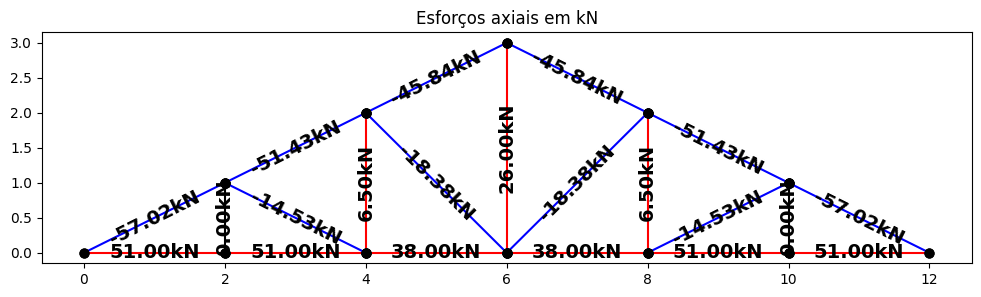

In [20]:
# Plotando esforços nas barras
plt.figure(5, figsize=(12,3))
plt.title('Esforços axiais em kN')

for barra in barras.index:
    N1, N2, Esf, sen, cos = barras.loc[barra, ['N1', 'N2', 'Esf', 'sen', 'cos']]
    x1, y1 = nos.loc[N1, ['X', 'Y']]
    x2, y2 = nos.loc[N2, ['X', 'Y']]
    
    if cos != 0:
        tg = sen/cos
        ang = np.arctan(tg)
        ang = 180*ang/np.pi
    else:
        ang = 90
    
    x = [x1, x2]
    y = [y1, y2]
    
    if Esf == 0:
        cor = 'k'
    elif Esf > 0:
        cor = 'r'
    else:
        # Esf < 0
        cor = 'b'
    plt.plot(x, y, cor, zorder=-1)

    plt.text(np.mean(x), np.mean(y),
             '{:.2f}kN'.format(Esf/1000),
             rotation=ang,
             horizontalalignment='center',
             verticalalignment='center',
             size = 14,
             weight ='bold'
            )
    
    # Desenhando rotulas
    plt.scatter(x, y, s=40, color='black', marker="o", zorder=0) 
    # 6 é restrição vertical e 5 na horizontal

Determinação dos Deslocamentos nodais

In [21]:
# Colocando deslocamentos nodais em Nós
Dx = []
Dy = []

for no in nos.index:
    gl1 = int(2*no-1)
    gl2 = int(2*no)
    
    Dx.append(D[gl1-1])
    Dy.append(D[gl2-1])

nos['Dx'] = Dx
nos['Dy'] = Dy 

nos

,X,Y,RX,RY,FX,FY,Dx,Dy
1,0,0,1.0,1.0,0.0,0.0,0.000000,0.000000
2,2,1,0.0,0.0,8000.0,-9000.0,0.000186,-0.000508
3,2,0,0.0,0.0,0.0,0.0,0.000049,-0.000508
4,4,2,0.0,0.0,8000.0,-9000.0,0.000194,-0.000646
5,4,0,0.0,0.0,0.0,0.0,0.000097,-0.000652
6,6,3,0.0,0.0,0.0,-15000.0,0.000133,-0.000634
7,6,0,0.0,0.0,0.0,0.0,0.000133,-0.000671
8,8,2,0.0,0.0,-8000.0,-9000.0,0.000073,-0.000646
9,8,0,0.0,0.0,0.0,0.0,0.000170,-0.000652
10,10,1,0.0,0.0,-8000.0,-9000.0,0.000080,-0.000508
